In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_parquet('./fhv_tripdata_2021-01.parquet')

In [10]:
df.shape

(1154112, 7)

In [11]:
## answer to question 1 is 1154112

In [12]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [13]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime

In [14]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13


In [16]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [18]:
df.duration.mean()

19.1672240937939

In [19]:
## answert to number 2 is 19,16

In [21]:
# removing all rides less than 1 minute and greater than 60 minutes
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [22]:
df.shape

(1109826, 8)

In [23]:
1154112 - 1109826

44286

In [24]:
## narrowing it down we dropped 44286 records

In [25]:
df['PUlocationID'] = df['PUlocationID'].fillna(-1)

In [30]:
df['PUlocationID'].value_counts()

-1.0      927008
 221.0      8330
 206.0      6797
 129.0      5379
 115.0      4082
           ...  
 111.0         5
 27.0          4
 34.0          3
 2.0           2
 110.0         1
Name: PUlocationID, Length: 262, dtype: int64

In [31]:
927008 / 1109826

0.8352732770722617

In [32]:
## the answer to question 4 is 83 percent

In [33]:
# also changing missing drop off location to negative 1
df['DOlocationID'] = df['DOlocationID'].fillna(-1)

In [34]:
categorical = ['PUlocationID', 'DOlocationID']
#numerical = ['trip_distance']

In [39]:
df[categorical] = df[categorical].astype(str)

In [40]:
df[categorical].dtypes

PUlocationID    object
DOlocationID    object
dtype: object

In [41]:
train_dicts = df[categorical].to_dict(orient='records')

In [43]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [44]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [45]:
##the answer to question four is 525

In [48]:
target = 'duration'
y_train = df[target].values

In [49]:
y_train

array([17.        , 17.        ,  8.28333333, ..., 16.2       ,
       19.43333333, 36.        ])

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_train)

/Users/isaachurwitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/isaachurwitz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


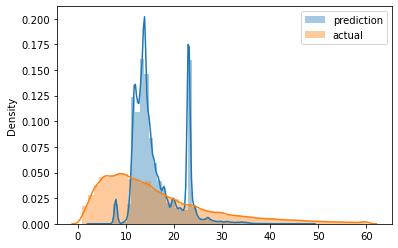

In [53]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [54]:
mean_squared_error(y_train, y_pred, squared=False)

10.52851910721158

In [55]:
## the answer to number 5 is 10.52

In [59]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [60]:
df_train = read_dataframe('./fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('./fhv_tripdata_2021-02.parquet')

In [61]:
len(df_train), len(df_val)

(1109826, 990113)

In [66]:
categorical = ['PUlocationID', 'DOlocationID']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)



In [67]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values


In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.014283201599097

In [ ]:
# the answer to question 6 is 11.01